# INSTALLMENTS_PAYMENTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
installments_payments = pd.read_csv('installments_payments.csv')

## INFORMASI AWAL

In [4]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [5]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


### Describe

In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [7]:
installments_payments.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,13605401.00,1903364.97,536202.91,1000001.00,1434191.00,1896520.00,2369094.00,2843499.00
SK_ID_CURR,13605401.00,278444.88,102718.31,100001.00,189639.00,278685.00,367530.00,456255.00
NUM_INSTALMENT_VERSION,13605401.00,0.86,1.04,0.00,0.00,1.00,1.00,178.00
NUM_INSTALMENT_NUMBER,13605401.00,18.87,26.66,1.00,4.00,8.00,19.00,277.00
DAYS_INSTALMENT,13605401.00,-1042.27,800.95,-2922.00,-1654.00,-818.00,-361.00,-1.00
DAYS_ENTRY_PAYMENT,13602496.00,-1051.11,800.59,-4921.00,-1662.00,-827.00,-370.00,-1.00
AMT_INSTALMENT,13605401.00,17050.91,50570.25,0.00,4226.09,8884.08,16710.21,3771487.85
AMT_PAYMENT,13602496.00,17238.22,54735.78,0.00,3398.26,8125.52,16108.42,3771487.85


### Boxplot

In [8]:
kolom_numerikal = installments_payments.select_dtypes(include=['number']).columns

C:\Users\sanny\AppData\Local\Temp\ipykernel_2316\1133846785.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_2316\1133846785.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_2316\1133846785.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_2316\1133846785.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_2316\1133846785.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_2316\1133846785.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_2316\1133846785.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


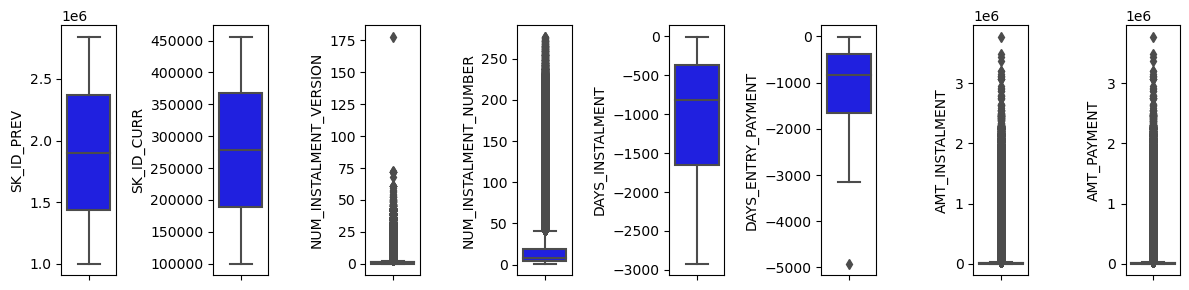

In [9]:
plt.figure(figsize=(12, 3))

for i in range(0, len(kolom_numerikal)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=installments_payments[kolom_numerikal[i]], color='blue', orient='v')
    plt.tight_layout()

### Distplot

### Heatmap

<Axes: >

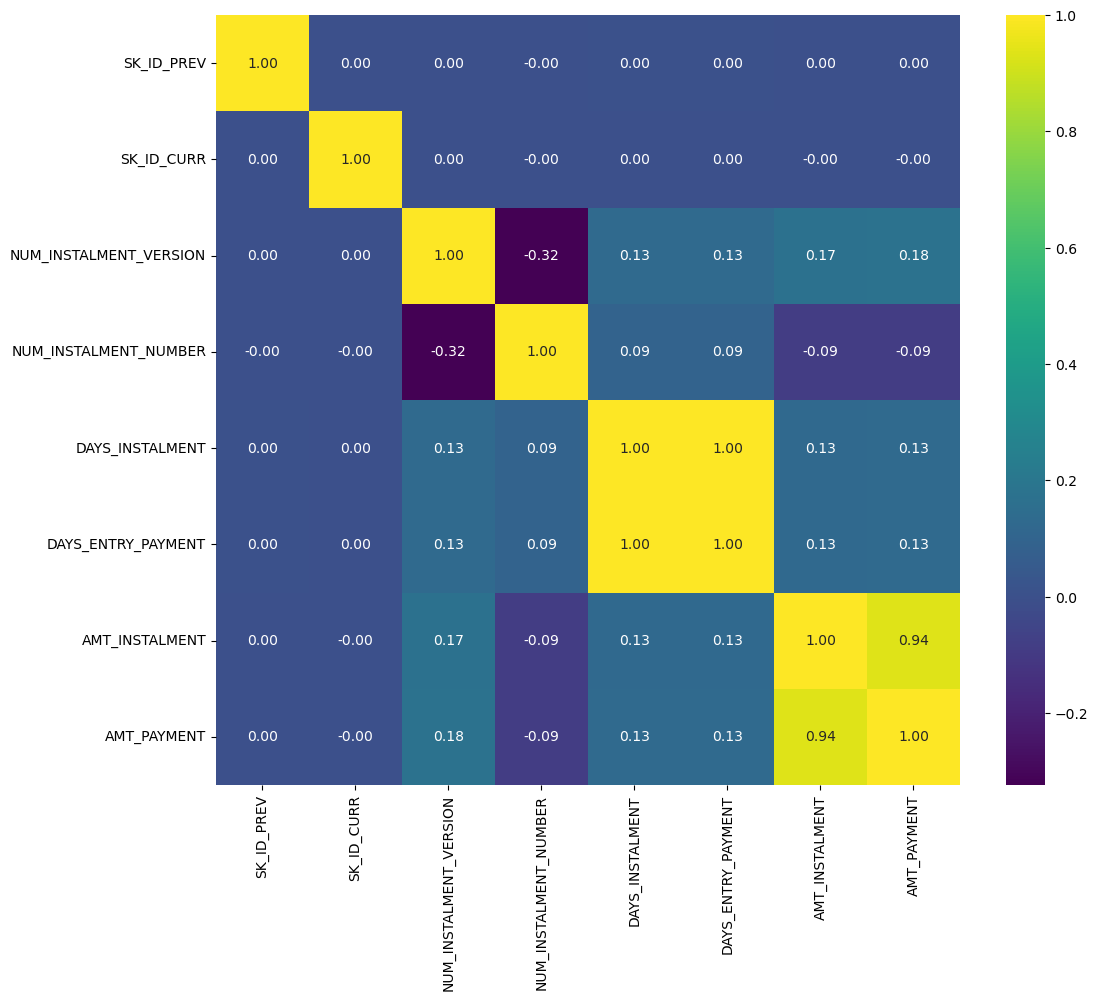

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(installments_payments[kolom_numerikal].corr(), cmap='viridis', annot=True, fmt='.2f')

# DATA PREPROCESSING

## DROP KOLOM REDUNDAN

In [11]:
kolom_dihapus = ['AMT_INSTALMENT', 'DAYS_ENTRY_PAYMENT']

installments_payments.drop(columns=kolom_dihapus, inplace=True)

## MISSING VALUES

### Cek Missing Values

In [12]:
# Hitung jumlah missing values untuk setiap kolom
jumlah_missing = installments_payments.isnull().sum()

# Hitung persentase missing values untuk setiap kolom
persentase_missing = round((jumlah_missing / len(installments_payments)) * 100, 2)

# Gabungkan hasil dalam satu DataFrame
missing_summary = pd.DataFrame({
    'Jumlah Missing Values': jumlah_missing,
    'Persentase Missing Values (%)': persentase_missing
})

# Filter hanya kolom yang memiliki missing values
missing_summary_filtered = missing_summary[missing_summary['Jumlah Missing Values'] > 0]

print(missing_summary_filtered)

             Jumlah Missing Values  Persentase Missing Values (%)
AMT_PAYMENT                   2905                           0.02


### Penanganan Missing values

In [13]:
# Hapus baris yang nilai Missing Valuesnya < 10%
threshold = 0.1  # 10%
columns_with_few_missing = installments_payments.columns[installments_payments.isnull().mean() < threshold]

# Hapus baris yang memiliki nilai null di kolom tersebut
installments_payments = installments_payments.dropna(subset=columns_with_few_missing)

### Cek kembali Missing Values

In [14]:
installments_payments.isna().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
AMT_PAYMENT               0
dtype: int64

## OUTLIERS

In [15]:
installments_payments.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,13602496.00,1903364.13,536206.56,1000001.00,1434182.00,1896524.00,2369094.00,2843499.00
SK_ID_CURR,13602496.00,278444.07,102718.47,100001.00,189639.00,278684.00,367530.00,456255.00
NUM_INSTALMENT_VERSION,13602496.00,0.86,1.03,0.00,0.00,1.00,1.00,73.00
NUM_INSTALMENT_NUMBER,13602496.00,18.87,26.66,1.00,4.00,8.00,19.00,277.00
DAYS_INSTALMENT,13602496.00,-1042.33,800.95,-2922.00,-1654.00,-818.00,-361.00,-1.00
AMT_PAYMENT,13602496.00,17238.22,54735.78,0.00,3398.26,8125.52,16108.42,3771487.85


### Menggeser Kolom dengan Nilai Negatif

In [16]:
# Mencari nilai minimum pada kolom
min_value = installments_payments['DAYS_INSTALMENT'].min()

# Jika ada nilai negatif, tambahkan nilai positif untuk menggeser semua nilai menjadi positif
if min_value < 0:
    installments_payments['DAYS_INSTALMENT'] = installments_payments['DAYS_INSTALMENT'] + abs(min_value)

In [17]:
installments_payments.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,13602496.00,1903364.13,536206.56,1000001.00,1434182.00,1896524.00,2369094.00,2843499.00
SK_ID_CURR,13602496.00,278444.07,102718.47,100001.00,189639.00,278684.00,367530.00,456255.00
NUM_INSTALMENT_VERSION,13602496.00,0.86,1.03,0.00,0.00,1.00,1.00,73.00
NUM_INSTALMENT_NUMBER,13602496.00,18.87,26.66,1.00,4.00,8.00,19.00,277.00
DAYS_INSTALMENT,13602496.00,1879.67,800.95,0.00,1268.00,2104.00,2561.00,2921.00
AMT_PAYMENT,13602496.00,17238.22,54735.78,0.00,3398.26,8125.52,16108.42,3771487.85


### Log Transformation

In [18]:
# Kolom ini dihapus karena tidak akan digunakan kembali
installments_payments = installments_payments.drop(columns=['SK_ID_PREV'])

In [19]:
print(type(installments_payments))

<class 'pandas.core.frame.DataFrame'>


In [20]:
installments_payments = pd.DataFrame(installments_payments)

In [21]:
# Pilih semua kolom numerik kecuali SK_ID_CURR
numeric_cols = installments_payments.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop('SK_ID_CURR')

# Terapkan log transformation hanya pada kolom numerik yang tersisa
installments_payments[numeric_cols] = installments_payments[numeric_cols].apply(np.log1p)

In [22]:
installments_payments.head()

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_PAYMENT
0,161674,0.69,1.95,7.46,8.85
1,151639,0.00,3.56,6.64,7.45
2,193053,1.10,0.69,7.96,10.14
3,199697,0.69,1.39,6.22,10.10
4,167756,0.69,1.10,7.34,7.68


## AGGREGASI

In [23]:
# Pertama, kelompokkan berdasarkan SK_ID_CURR dan hitung rata-rata untuk kolom lainnya
agg_df = installments_payments.groupby('SK_ID_CURR').mean().reset_index()

# Selanjutnya, hitung berapa kali setiap SK_ID_CURR muncul dan tambahkan sebagai kolom baru
agg_df['FREQ_INSTALMENT_PAY'] = installments_payments.groupby('SK_ID_CURR').size().values

In [25]:
installments_payments = agg_df

In [26]:
installments_payments.head()

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_PAYMENT,FREQ_INSTALMENT_PAY
0,100001,0.75,1.27,5.47,8.50,7
1,100002,0.71,2.23,7.87,9.22,19
2,100003,0.71,1.67,7.20,10.18,25
3,100004,0.83,1.06,7.68,8.81,3
4,100005,0.74,1.68,7.76,8.62,9


## SCALING

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Identifikasi kolom yang bertipe boolean
boolean_columns = installments_payments.select_dtypes(include=['bool']).columns

# Tambahkan kolom SK_ID_CURR ke daftar kolom yang akan dikecualikan
exclude_columns = ['SK_ID_CURR'] + list(boolean_columns)

# Pilih kolom yang bukan boolean dan bukan SK_ID_CURR
scaling_columns = installments_payments.columns.difference(exclude_columns)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan scaling hanya pada kolom yang dipilih
installments_payments[scaling_columns] = scaler.fit_transform(installments_payments[scaling_columns])

In [28]:
installments_payments.head()

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_PAYMENT,FREQ_INSTALMENT_PAY
0,100001,0.26,0.14,0.69,0.57,0.02
1,100002,0.25,0.37,0.99,0.62,0.05
2,100003,0.25,0.24,0.90,0.69,0.06
3,100004,0.29,0.09,0.96,0.59,0.01
4,100005,0.26,0.24,0.97,0.58,0.02


# SIMPAN DATASET KE CSV

In [29]:
# Simpan DataFrame ke file CSV
installments_payments.to_csv('code_installments_payments.csv', index=False)